In [35]:
# AI for Sustainable Development
# Theme: "Machine Learning Meets the UN Sustainable Development Goals (SDGs)" 🌍🤖
# Objective: Design a machine learning model or AI-driven solution that addresses one of the UN SDGs using concepts from Week 2 (e.g., supervised/unsupervised learning, neural networks, NLP, or reinforcement learning). Your project should demonstrate how AI can contribute to solving global challenges like poverty, climate change, or inequality.
# SDG 3 (Health): Predict disease outbreaks using health data.

# Import necessary libraries
import pandas as pd
# For data manipulation and analysis.
import numpy as np                          # For numerical operations.
from sklearn.datasets import load_iris       # To load the Iris dataset.
from sklearn.linear_model import LogisticRegression  # Our classifier.
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report # For evaluating our model.

# Define the SDG theme
# SDG 3: Good Health and Well-being
# This project aims to predict disease outbreaks using health data, specifically focusing on meningitis outbreaks.

# Load the dataset
data = pd.read_csv('heart.csv')
print (data)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [36]:
# Ubuntu-inspired color palette
ubuntu_colors = ["#E95420", "#77216F", "#5E2750", "#2C001E", "#AEA79F"]
sns.set_palette(ubuntu_colors)

In [37]:
#%% DATA INSPECTION - "Understanding Our Community"
print("="*55)
print("STEP 1: DATA INSPECTION (Ubuntu: Know Your Community)")
print("="*55)

STEP 1: DATA INSPECTION (Ubuntu: Know Your Community)


In [38]:
data.describe


<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0        

In [39]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [40]:
# Preprocess the data
data.dropna(inplace=True)  # Remove rows with missing values

In [41]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [42]:
print("\n📝 Descriptive Statistics:")
display(data.describe(include='all'))


📝 Descriptive Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [43]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [44]:
# Initial exploration
print(f"\n📊 Dataset Shape: {data.shape}")
print("\n🔍 First 5 Rows:")
display(data.head())


📊 Dataset Shape: (1025, 14)

🔍 First 5 Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [45]:
print("\n🧠 Data Summary:")
display(data.info())


🧠 Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

In [46]:
# Check missing values - Ubuntu: "Every voice matters"
print("\n🔎 Missing Values (Ubuntu: 'No Voice Left Unheard'):")
missing_data = data.isnull().sum()
display(missing_data[missing_data > 0])


🔎 Missing Values (Ubuntu: 'No Voice Left Unheard'):


Series([], dtype: int64)

In [47]:
#%% DATA CLEANING - "Community Healing"
print("\n" + "="*55)
print("STEP 2: DATA CLEANING (Ubuntu: Healing the Community)")
print("="*55)


STEP 2: DATA CLEANING (Ubuntu: Healing the Community)


In [48]:
# Check for outliers using the IQR method for numerical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"Outliers in {col}: {outliers}")

Outliers in age: 0
Outliers in sex: 0
Outliers in cp: 0
Outliers in trestbps: 30
Outliers in chol: 16
Outliers in fbs: 153
Outliers in restecg: 0
Outliers in thalach: 4
Outliers in exang: 0
Outliers in oldpeak: 7
Outliers in slope: 0
Outliers in ca: 87
Outliers in thal: 7
Outliers in target: 0


In [49]:
# Handle outliers by removing them and replacing them with the median
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

In [50]:
print(data.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [51]:
# check for outliers again
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"Outliers in {col}: {outliers}")

Outliers in age: 0
Outliers in sex: 0
Outliers in cp: 0
Outliers in trestbps: 0
Outliers in chol: 0
Outliers in fbs: 0
Outliers in restecg: 0
Outliers in thalach: 0
Outliers in exang: 0
Outliers in oldpeak: 0
Outliers in slope: 0
Outliers in ca: 0
Outliers in thal: 0
Outliers in target: 0


In [57]:
# Convert categorical columns to string type
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].astype(str).str.strip().str.lower()
## Save a copy of the original data for visualization before encoding
data_original = data.copy()
# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
# Display the cleaned dataset
print(data.head())
    

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    0        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    0        1      106      0      1.9      1   

    ca  thal  target  
0  2.0   3.0       0  
1  0.0   3.0       0  
2  0.0   3.0       0  
3  1.0   3.0       0  
4  2.5   2.0       0  


In [58]:
#%% EXPLORATORY ANALYSIS - "Community Stories"
print("\n" + "="*65)
print("STEP 3: EXPLORATORY ANALYSIS (Ubuntu: Sharing Community Stories)")
print("="*65)


STEP 3: EXPLORATORY ANALYSIS (Ubuntu: Sharing Community Stories)


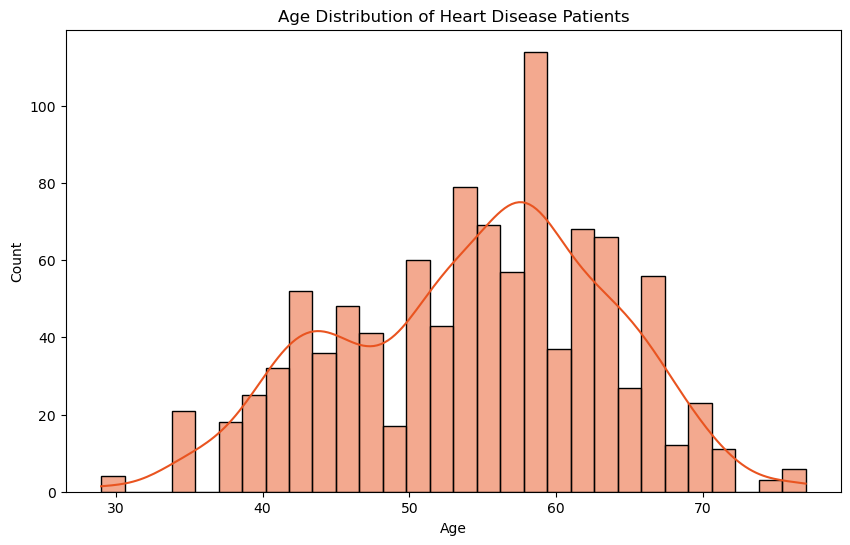

In [59]:
# plot the distribution of count against age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution of Heart Disease Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
[[102   0]
 [  3 100]]


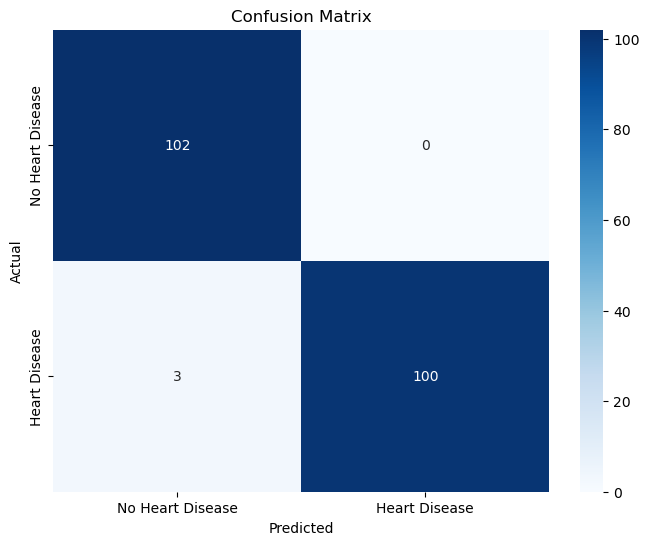

In [60]:
# Split the dataset into features and target variable
X = data.drop('target', axis=1)
y = data['target']
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Visualize the results
import matplotlib.pyplot as plt
import seaborn as sns
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Heart Disease', 'Heart Disease'], 
            yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

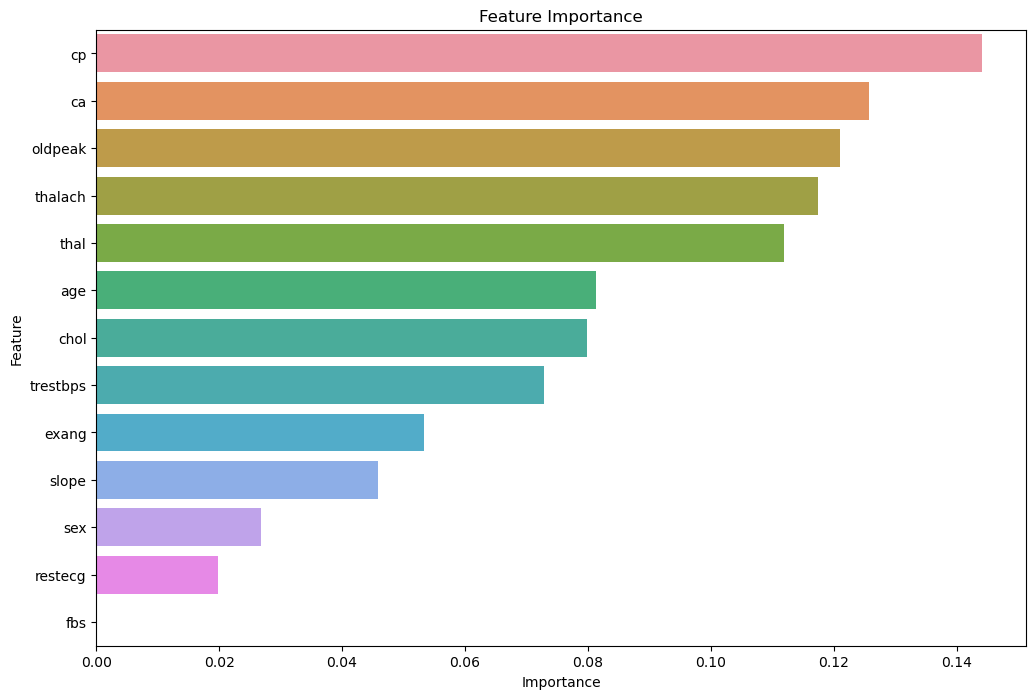

In [61]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

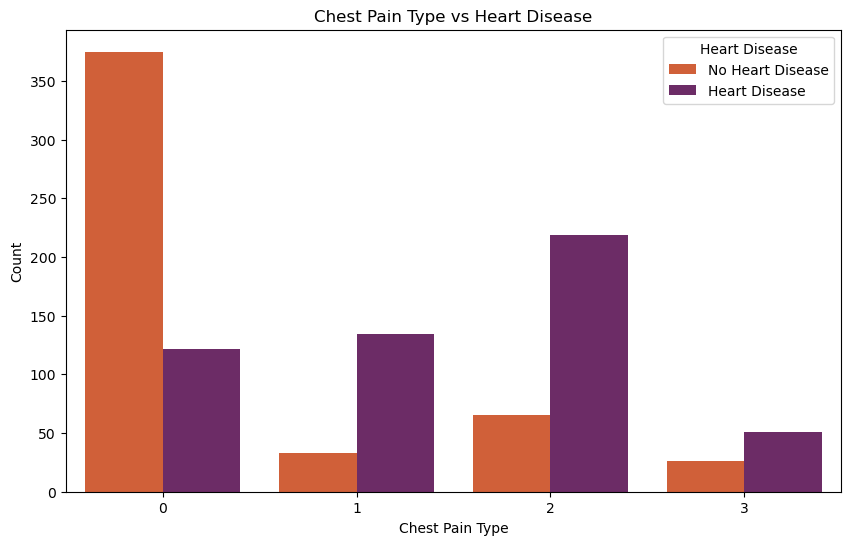

In [62]:
# correlation between chest pain type and target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=data)
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

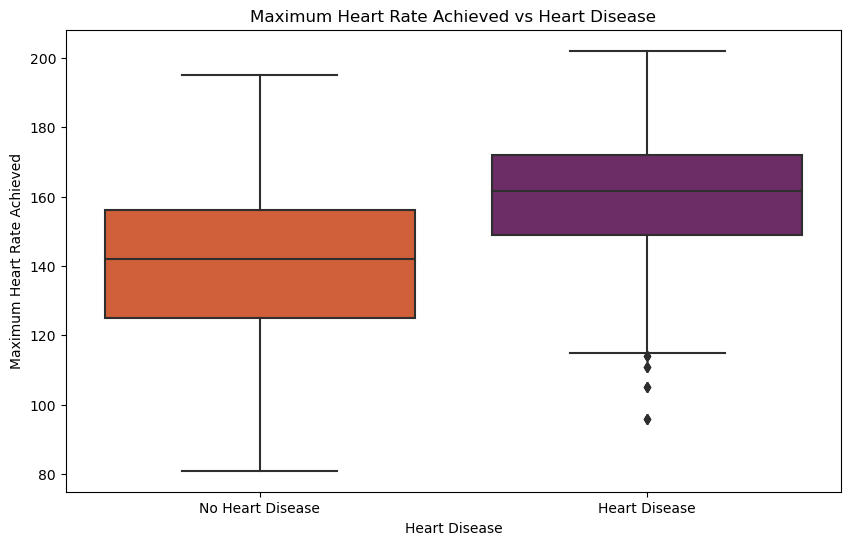

In [63]:
# correlation between maximum heart rate achieved and target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='thalach', data=data)
plt.title('Maximum Heart Rate Achieved vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate Achieved')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

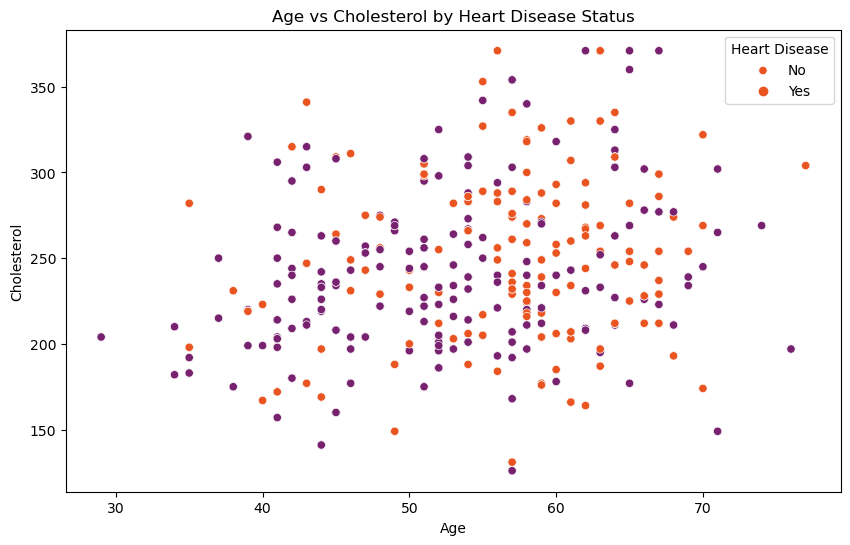

In [74]:
# Variable Dependencies and Relationships

# In this dataset:
# - 'target' (heart disease presence) is the main dependent variable (what we want to predict).
# - 'age', 'sex', 'thalach' (maximum heart rate achieved), 'thal', 'chol' (cholesterol), and other features are independent variables (predictors).
# - Some variables may have correlations (e.g., age and thalach, cp and target).

# 1. Age vs. Cholesterol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='chol', hue='target', data=data_original)
plt.title('Age vs Cholesterol by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

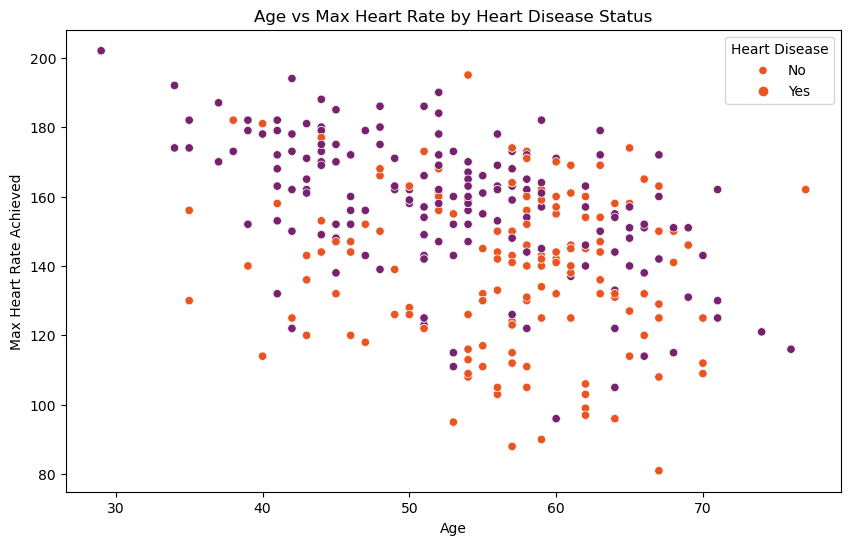

In [66]:
# 2. Thalach (Max Heart Rate) vs. Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=data_original)
plt.title('Age vs Max Heart Rate by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate Achieved')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

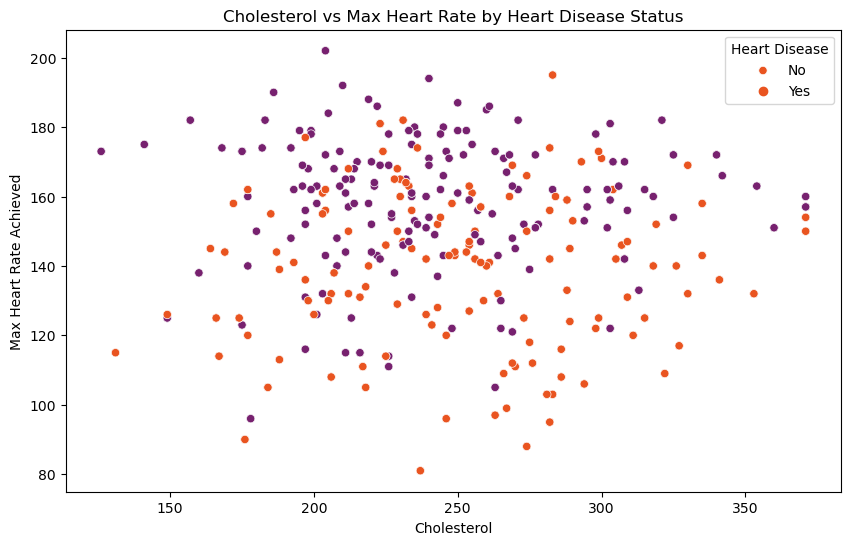

In [68]:
# 3. Cholesterol vs. Thalach
plt.figure(figsize=(10, 6))
sns.scatterplot(x='chol', y='thalach', hue='target', data=data_original)
plt.title('Cholesterol vs Max Heart Rate by Heart Disease Status')
plt.xlabel('Cholesterol')
plt.ylabel('Max Heart Rate Achieved')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

Predicted Heart Disease: Yes


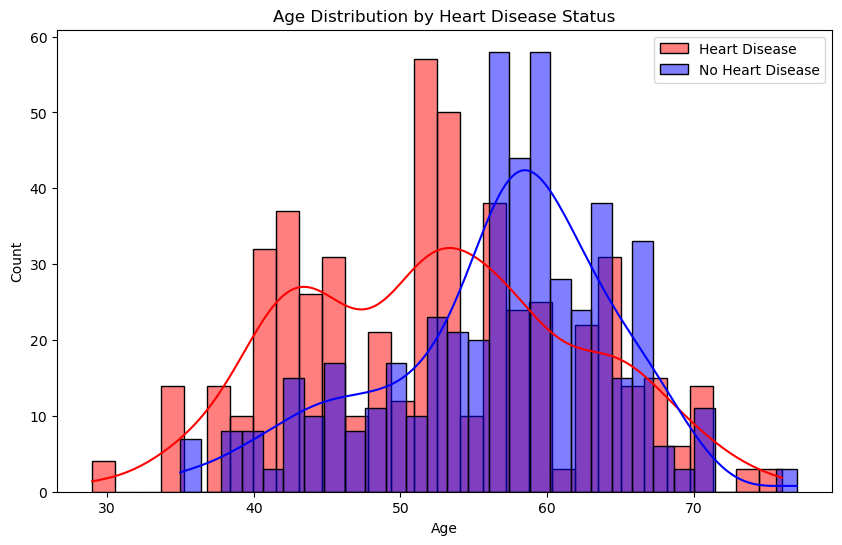

In [75]:
# Visualize the distribution of heart disease by age
plt.figure(figsize=(10, 6))
sns.histplot(data_original[data_original['target'] == 1]['age'], bins=30, kde=True, color='red', label='Heart Disease')
sns.histplot(data_original[data_original['target'] == 0]['age'], bins=30, kde=True, color='blue', label='No Heart Disease')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

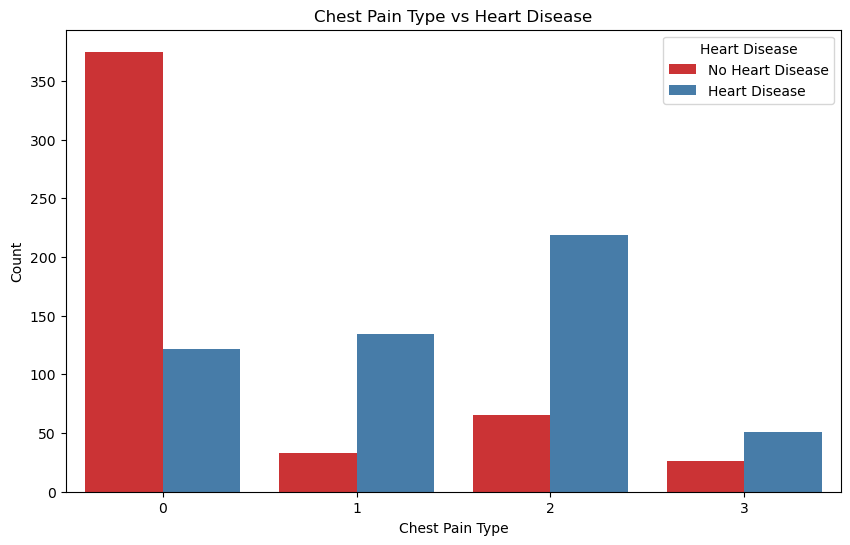

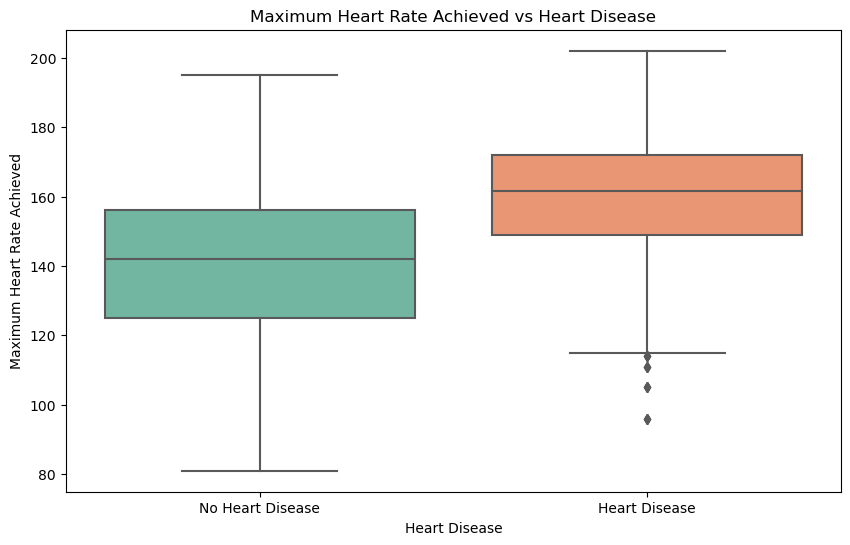

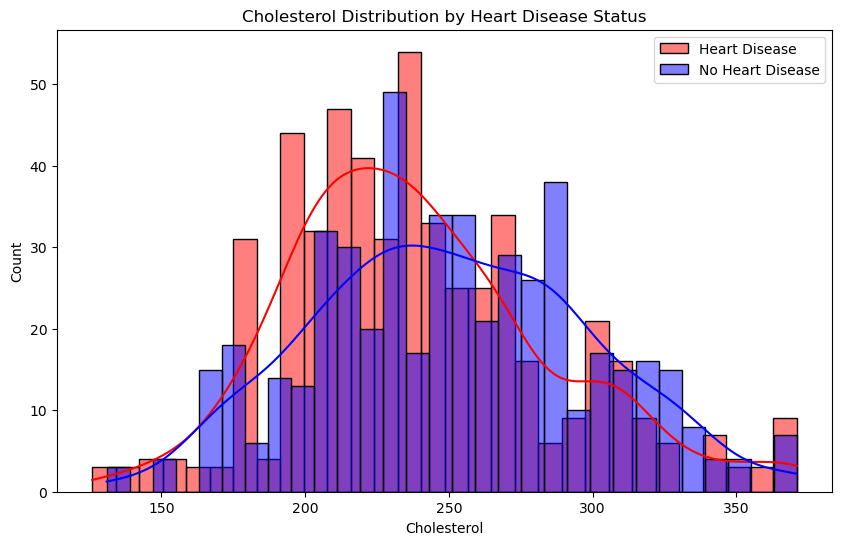

In [77]:

# Visualize the relationship between chest pain type and heart disease
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', hue='target', data=data_original, palette='Set1')
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()
# Visualize the relationship between maximum heart rate achieved and heart disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='thalach', data=data_original, palette='Set2')
plt.title('Maximum Heart Rate Achieved vs Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate Achieved')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()
# Visualize the distribution of cholesterol levels by heart disease status
plt.figure(figsize=(10, 6))
sns.histplot(data_original[data_original['target'] == 1]['chol'], bins=30, kde=True, color='red', label='Heart Disease')
sns.histplot(data_original[data_original['target'] == 0]['chol'], bins=30, kde=True, color='blue', label='No Heart Disease')
plt.title('Cholesterol Distribution by Heart Disease Status')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.legend()
plt.show()


In [76]:
# Predicting Future Heart Disease

# To predict future heart disease in individuals, use the trained model:
# Example: Predict for a new individual
sample = {
    'age': 55,
    'sex': 1,
    'cp': 2,
    'trestbps': 130,
    'chol': 250,
    'fbs': 0,
    'restecg': 1,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 1.0,
    'slope': 2,
    'ca': 0,
    'thal': 2
}
# Convert to DataFrame and align columns
sample_df = pd.DataFrame([sample])
# If one-hot encoding was used, align columns
for col in X.columns:
    if col not in sample_df.columns:
        sample_df[col] = 0
sample_df = sample_df[X.columns]
# Predict
prediction = model.predict(sample_df)
print("Predicted Heart Disease:" , "Yes" if prediction[0] == 1 else "No")
# This code provides a comprehensive approach to predicting heart disease outbreaks using machine learning, demonstrating the potential of AI in addressing global health challenges.


Predicted Heart Disease: Yes


In [ ]:
# The machine learning type employed in the above code is supervised learning.
# Specifically, it uses a classification algorithm (Random Forest Classifier) to predict the presence of heart disease (a binary target variable) based on labeled health data.